# Problem 1

$y_{des}$ is given as a square wave with periodicity $0.015\pi$.

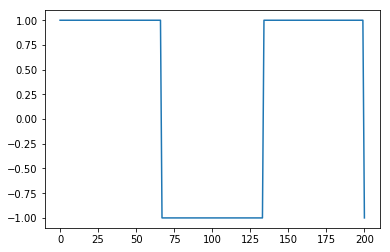

In [1]:
from cvxpy import *
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def h(t):
    return 1/9*(0.9)**t*(1-0.4*np.cos(2*t))

t = np.linspace(0, 200, 201)
%matplotlib inline
ydes = signal.square(0.015*np.pi*t)
plt.plot(t, ydes)


In [ ]:
u = Variable(1,201)
